In [37]:
import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import MeanShift , estimate_bandwidth
%matplotlib inline

In [38]:
image=cv2.imread('park.jpg')

In [39]:
scale_percent = 20
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

After resizing image to reduce time of meanshift,we should reshape image into a matrix that is array of points in bgr space so that every pixel is represented as a vector with 3 parameters.By passing this parameter to meanshift method we can apply mean shift on image.With examining this method with different input parameters i found that by redusing "quantile" and increasing "n_samples" the result would be better.Also when "bin_seeding" is true it will speed up the program.

In [40]:
matrix=np.reshape(image, [-1, 3])

In [41]:
bandwidth = estimate_bandwidth(matrix, quantile=0.06, n_samples=100)   

centers, labels=sklearn.cluster.mean_shift(matrix, bandwidth, seeds=None, bin_seeding=True, 
                           min_bin_freq=1, cluster_all=True, max_iter=300, n_jobs=None)

After applying meanshift we can get labels of each pixel and reshape it to a segmented image.We get the label and reshape image i way that each pixel get intensity of related center.

In [42]:
segmentedImg = np.uint8(centers[np.reshape(labels, image.shape[:2])]) 

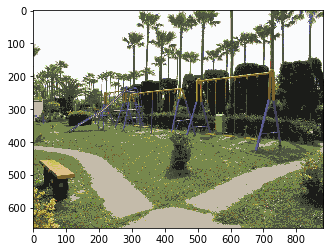

In [43]:
res=cv2.cvtColor(segmentedImg,cv2.COLOR_BGR2RGB)
plt.imshow(res)

In [44]:
# cv2.imwrite('res04.jpg',segmentedImg)

True